In [401]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

# ¿El turismo en España sigue una fuerte estacionalidad, con picos en verano y descensos en invierno?

*Primavera: Marzo, abril, mayo.

*Verano: Junio, julio, agosto.

*Otoño: Septiembre, octubre, noviembre.

*Invierno: Diciembre, enero, febrero.

In [422]:
turismo = pd.read_excel("./src/data/tourism_dataset.xlsx") #Importa Dataset de la carpeta src
turismo=pd.DataFrame(turismo) #Convierte a formato Dataframe

#Creo un dataframe aparte para limpiar el nombre de las columnas
reemplazo_comunidad=turismo[" "].str.split(expand=True)
reemplazo_comunidad= reemplazo_comunidad.drop(columns = [0, 2, 3, 4])
#reemplazo_comunidad

#Union entre el datafram principal y el datafram de nombres limpios
turismo= pd.concat([turismo, reemplazo_comunidad], axis=1)
turismo = turismo.rename(columns={1: 'Comunidad'}) #Renombra la columna recien concatenada
turismo= turismo.drop(columns = [" "]) #Elimina la columna original 

#Numeros y caracteres innecesarios en las fechas
turismo.columns=turismo.columns.str.replace("M", " ")
turismo.columns=turismo.columns.str.replace(".5", "")
turismo.columns=turismo.columns.str.replace(".4", "")
turismo.columns=turismo.columns.str.replace(".3", "")
turismo.columns=turismo.columns.str.replace(".2", "")
turismo.columns=turismo.columns.str.replace(".1", "")

turismo = turismo.set_index("Comunidad") #Nuevo indice seranlos nombres de las comunidades
turismo = turismo.transpose() #Se revierte el orden para poner las fechas como indices

#Convertir los valores a STR para poder reemplazar simbolos y luego convertir a formato numerico
turismo = turismo.astype(str)
turismo = turismo.replace('\\.', '', regex=True)
turismo = turismo.replace(',', '.', regex=True)  # Cambia comas por puntos
turismo = turismo.apply(pd.to_numeric, errors='coerce')

turismo = turismo.loc[:, ~turismo.columns.duplicated()]#Elimina columnas duplicadas
turismo = turismo[~turismo.index.duplicated(keep='first')]

nuevo_índice = pd.to_datetime(turismo.index, format='%Y %m').to_period('M') #Convierto a formato fecha quedandome solo con mes y año.
turismo.index = nuevo_índice #Actualizo el indice en el Dataframe principal
turismo = turismo.sort_index()  # Ordena en ascendente

def estacion(df = turismo, año = 2024, comunidades=("Madrid",), temporadas=("invierno",)): #Funcion para filtrar el Dataframe
    '''
    Filtra el DataFrame principal con:
    - Rango de años.
    - Ciudades Seleccionadas en España.
    - Temporadas Seleccionadas.

    P/ejem: 
    estacion(turismo, (2020, 2024), ["Madrid", "Barcelona"], ("invierno", "primavera"))
    '''
    
    temporada_dict={ 
        "primavera":(3,4,5),
        "verano" : (6,7,8),
        "otoño" : (9,10,11),
        "invierno" : (12, 1, 2)}
    
    meses = sum((temporada_dict[temporada] for temporada in temporadas), ())
    
    if isinstance(comunidades, str):
        comunidades = [comunidades]
    filtro = (
        (df.index.strftime('%Y').astype(int) >= año[0]) &
        (df.index.strftime('%Y').astype(int) <= año[1]) &
        (df.index.strftime('%m').astype(int).isin(meses))
    )
    
    # Devuelve el DataFrame filtrado para las comunidades seleccionadas
    return df.loc[filtro, comunidades]

In [423]:
turismo.columns

Index(['Andalucía', 'Almería', 'Cádiz', 'Córdoba', 'Granada', 'Huelva', 'Jaén',
       'Málaga', 'Sevilla', 'Aragón', 'Huesca', 'Teruel', 'Zaragoza',
       'Asturias,', 'Asturias', 'Balears,', 'Canarias', 'Palmas,', 'Santa',
       'Cantabria', 'Castilla', 'Ávila', 'Burgos', 'León', 'Palencia',
       'Salamanca', 'Segovia', 'Soria', 'Valladolid', 'Zamora', 'Albacete',
       'Ciudad', 'Cuenca', 'Guadalajara', 'Toledo', 'Cataluña', 'Barcelona',
       'Girona', 'Lleida', 'Tarragona', 'Comunitat', 'Alicante/Alacant',
       'Castellón/Castelló', 'Valencia/València', 'Extremadura', 'Badajoz',
       'Cáceres', 'Galicia', 'Coruña,', 'Lugo', 'Ourense', 'Pontevedra',
       'Madrid,', 'Madrid', 'Murcia,', 'Murcia', 'Navarra,', 'Navarra', 'País',
       'Araba/Álava', 'Bizkaia', 'Gipuzkoa', 'Rioja,', 'Ceuta', 'Melilla',
       'Nacional'],
      dtype='object', name='Comunidad')

In [430]:
covid = estacion(turismo, año=(2019, 2024), comunidades="Barcelona", temporadas=("primavera","verano", "otoño", "invierno"))

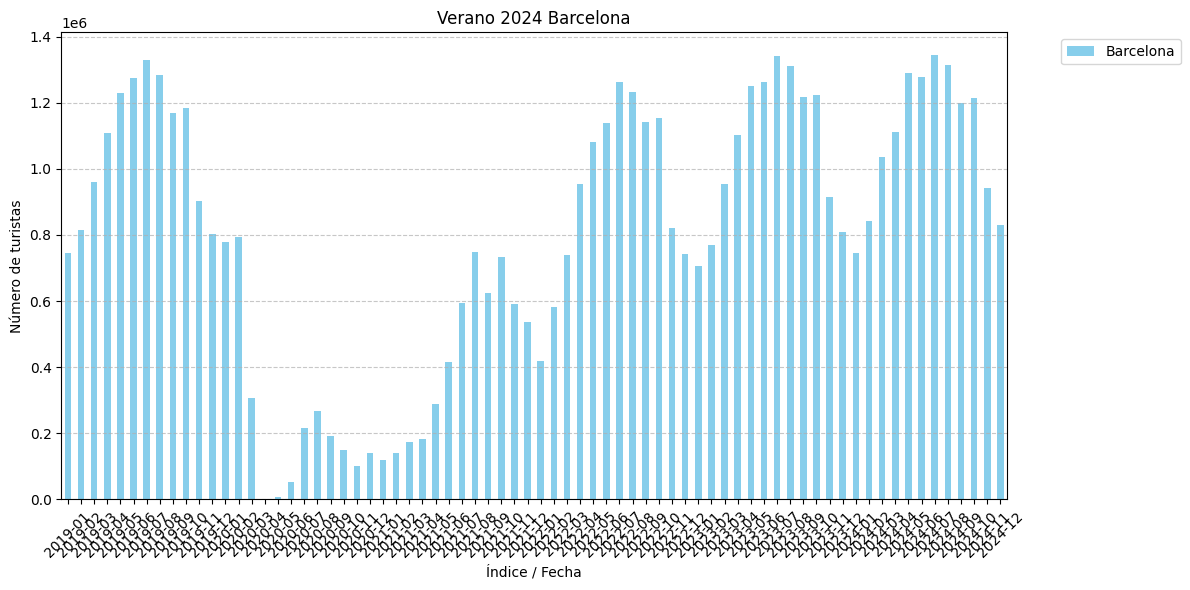

In [431]:
covid.plot(kind='bar', stacked=True, figsize=(12, 6), color='skyblue')
plt.title("Verano 2024 Barcelona")
plt.xlabel("Índice / Fecha")
plt.ylabel("Número de turistas")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de guía en el eje Y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda fuera del gráfico
plt.tight_layout()  # Ajustar automáticamente la disposición del gráfico
plt.show()

In [411]:
estacion(turismo, año=(1999, 2000), comunidades=["Barcelona", "Madrid"], temporadas=("primavera","verano"))

Comunidad,Barcelona,Madrid
2000-08,562593,432904
2000-07,605042,478475
2000-06,548128,524392
2000-05,518041,543462
2000-04,476478,518869
2000-03,430641,494660
1999-08,549203,390662
1999-07,568343,452583
1999-06,512037,496720
1999-05,525706,517263


# ¿El turismo en España es mas de Paseo o Excursion?

In [467]:
tipologia = pd.read_excel("./src/data/tipologia_viaje.xlsx") #Importa el archivo
tipologia.columns=tipologia.columns.str.replace("M", " ")#Reemplaza la M de las fechas por un espacio
pd.options.display.float_format = '{:.1f}'.format #Los valores venian con anotacion cientifica y confirma el formato float y redondea a un decimal


In [468]:
tipologia

,,2025 01,2024 12,2024 11,2024 10,2024 09,2024 08,2024 07,2024 06,2024 05,...,2016 07,2016 06,2016 05,2016 04,2016 03,2016 02,2016 01,2015 12,2015 11,2015 10
0,Dato base,8147788.0,8779950.0,9053630.0,12919686.0,13310160.0,16621567.0,15957871.0,12483868.0,13088646.0,...,14103246.0,10882964.0,10409297.0,9254452.0,7684502.0,6254862.0,6133318.0,6417639,6429628,9940966
1,Tasa de variación anual,12.5,2.7,12.3,9.7,6.4,7.3,8.0,8.8,12.0,...,7.0,7.5,4.3,5.6,10.6,6.7,4.0,3.8,4.4,5.2
2,Acumulado en lo que va de año,8147788.0,137640110.0,128860160.0,119806530.0,106886844.0,93576684.0,76955117.0,60997245.0,48513377.0,...,64722641.0,50619395.0,39736431.0,29327134.0,20072683.0,12388180.0,6133318.0,,,
3,Tasa de variación acumulada,12.5,9.4,9.9,9.8,9.8,10.3,10.9,11.7,12.5,...,6.5,6.4,6.1,6.8,7.3,5.3,4.0,,,
4,Turista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Dato base,5065094.0,5264375.0,5670219.0,8961932.0,9602015.0,10929584.0,10852347.0,9299574.0,9255985.0,...,9545792.0,7552758.0,7111154.0,6086327.0,4627206.0,3678726.0,3526537.0,3512914,3754802,6432341
6,Tasa de variación anual,6.1,1.1,10.4,9.5,9.2,7.3,7.3,11.9,11.5,...,10.0,12.9,8.2,11.6,15.4,13.9,11.0,7.9,10.6,8.9
7,Acumulado en lo que va de año,5065094.0,93759297.0,88494922.0,82824703.0,73862771.0,64260756.0,53331172.0,42478825.0,33179251.0,...,42128500.0,32582708.0,25029951.0,17918796.0,11832469.0,7205263.0,3526537.0,,,
8,Tasa de variación acumulada,6.1,10.1,10.7,10.7,10.8,11.1,11.9,13.2,13.5,...,11.4,11.8,11.5,12.9,13.6,12.5,11.0,,,
9,Excursionista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ¿El turismo de negocios va en aumento o en disminucion?

In [434]:
motivo = pd.read_excel("./src/data/motivo_viaje.xlsx")

In [435]:
motivo

,,2025M01,2024M12,2024M11,2024M10,2024M09,2024M08,2024M07,2024M06,2024M05,...,2016M07,2016M06,2016M05,2016M04,2016M03,2016M02,2016M01,2015M12,2015M11,2015M10
0,Dato base,5065094.00,5264375.00,5670219.00,8961932.00,9602015.00,10929584.00,10852347.00,9299574.00,9255985.00,...,9545792.00,7552758.00,7111154.00,6086327.00,4627206.00,3678726.00,3526537.00,3512914,3754802,6432341
1,Tasa de variación anual,6.06,1.06,10.41,9.47,9.17,7.30,7.27,11.94,11.51,...,9.99,12.89,8.19,11.59,15.45,13.95,11.04,7.92,10.56,8.89
2,Acumulado en lo que va de año,5065094.00,93759297.00,88494922.00,82824703.00,73862771.00,64260756.00,53331172.00,42478825.00,33179251.00,...,42128500.00,32582708.00,25029951.00,17918796.00,11832469.00,7205263.00,3526537.00,,,
3,Tasa de variación acumulada,6.06,10.09,10.67,10.69,10.84,11.10,11.91,13.16,13.51,...,11.42,11.85,11.54,12.93,13.64,12.50,11.04,,,
4,"Ocio, recreo y vacaciones",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Dato base,4119870.00,4257518.00,4622268.00,7796628.00,8474002.00,10156706.00,9894693.00,8081685.00,8070902.00,...,8664754.00,6591364.00,6078190.00,4921015.00,3747057.00,2814264.00,2671999.00,2631906,2926298,5311088
6,Tasa de variación anual,5.08,1.99,10.53,11.41,7.94,8.13,7.25,11.11,10.96,...,10.64,11.13,6.01,8.82,17.97,8.19,5.02,-1.39,3.98,4.48
7,Acumulado en lo que va de año,4119870.00,81049012.00,76791494.00,72169226.00,64372598.00,55898597.00,45741890.00,35847197.00,27765513.00,...,35488643.00,26823889.00,20232525.00,14154335.00,9233320.00,5486263.00,2671999.00,,,
8,Tasa de variación acumulada,5.08,9.86,10.33,10.32,10.19,10.54,11.08,12.19,12.51,...,9.74,9.45,8.91,10.20,10.96,6.62,5.02,,,
9,"Negocio, motivos profesionales",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ¿Los turistas de ciertos países gastan más dinero en España que otros?

In [436]:
pais = pd.read_excel("./src/data/Gasto_segun_paisxlsx.xlsx")

In [443]:
pais

,,2025M01,2024M12,2024M11,2024M10,2024M09,2024M08,2024M07,2024M06,2024M05,...,2016M07,2016M06,2016M05,2016M04,2016M03,2016M02,2016M01,2015M12,2015M11,2015M10
0,Gasto total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dato base,7132.04,7590.34,7707.67,11898.70,12613.05,15364.42,15513.29,12356.78,11686.91,...,10238.54,7817.41,6917.93,5627.99,4624.47,3706.27,3737.26,3773.27,3872.84,6280.63
3,Reino Unido,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dato base,1096.09,1096.36,1156.75,2124.25,2451.03,3025.96,2846.60,2481.75,2193.70,...,2197.01,1766.61,1495.25,1153.23,924.02,690.25,608.99,731.74,659.06,1336.41
5,Países Nórdicos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Dato base,618.36,628.90,687.40,785.42,598.42,522.26,1041.21,614.17,513.16,...,817.74,418.73,384.16,463.99,536.79,473.38,493.27,426.94,469.27,526.16
7,Resto del Mundo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Dato base,3798.51,3918.73,3996.30,6000.79,6441.72,7101.10,7890.93,6615.82,6187.35,...,4547.45,3651.79,3117.13,2415.05,1981.14,1629.28,1739.33,1740.17,1773.86,2626.53
9,Alemania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ¿Algunas comunidades autónomas han experimentado un crecimiento más acelerado en el número de turistas que otras?

In [438]:
sector = pd.read_excel("./src/data/Gasto_por_sector.xlsx")

In [439]:
sector

,,2022(A),2021(P),2020,2019,2018,2017,2016
0,A: Productos característicos del turismo,61483.7,24481.7,15345.6,58853.0,56185.2,53153.9,47704.1
1,1A: Hoteles y similares,17406.1,7168.6,4004.6,19430.4,17852.3,15792.9,14177.2
2,1B: Servicios de alquiler inmobiliario,5797.7,2276.4,764.9,5289.2,5124.4,5066.9,4277.1
3,2: Servicios de provisión de alimentos y bebidas,10653.8,4419.1,2329.7,10380.1,10393.5,10054.5,9123.3
4,3: Servicios de transporte de pasajeros por fe...,937.1,260.8,167.9,600.9,979.2,1045.4,874.9
5,4: Servicios de transporte de pasajeros por ca...,1421.5,674.4,365.7,1365.2,1770.9,1816.7,1642.0
6,5: Servicios de transporte de pasajeros por agua,463.3,66.7,79.6,281.2,333.1,384.6,329.6
7,6: Servicios de transporte aéreo de pasajeros,7645.2,2408.0,3111.8,6005.6,6034.5,5675.3,4886.9
8,7: Servicios de alquiler de equipos de transporte,2283.5,1079.3,531.9,1456.6,695.1,684.0,666.0
9,8: Agencias de viajes y otros servicios de res...,1357.2,419.8,538.4,1608.5,1452.8,1882.9,1819.9
